# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

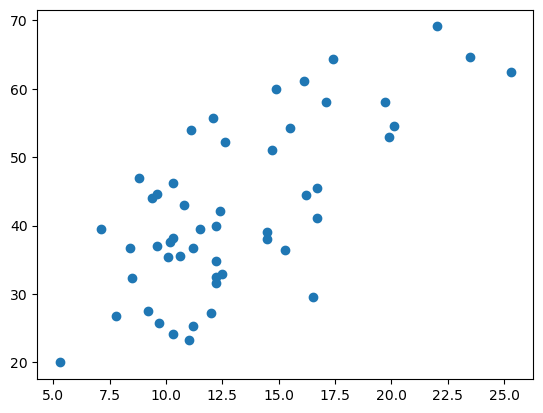

In [4]:
plt.scatter(data['PovPct'], data['TeenBrth']) 

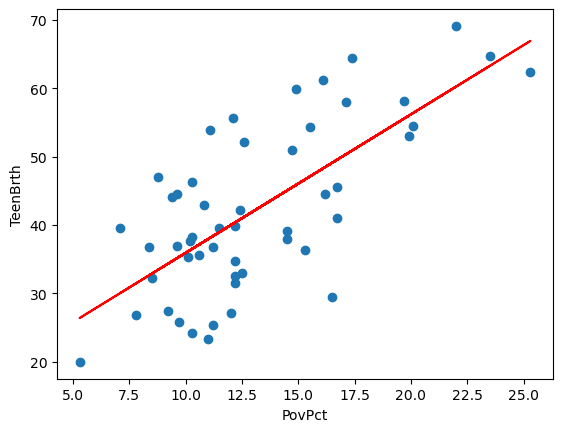

In [7]:
plt.scatter(data['PovPct'], data['TeenBrth']) 
# define the predictor and response variables
X = data['PovPct'].values
y = data['TeenBrth'].values

# calculate the mean of X and y
x_mean = np.mean(X)
y_mean = np.mean(y)

# calculate the slope of the regression line
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean) ** 2)
slope = numerator / denominator

# calculate the intercept of the regression line
intercept = y_mean - slope * x_mean

# calculate the predicted values
y_hat = slope * X + intercept

plt.plot(data['PovPct'],y_hat,color='r')
plt.xlabel("PovPct")
plt.ylabel("TeenBrth")

plt.show()

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [9]:
data


,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1
5,Colorado,8.8,26.2,79.1,5.8,47.0
6,Connecticut,9.7,14.1,45.1,4.6,25.8
7,Delaware,10.3,24.7,77.8,3.5,46.3
8,District_of_Columbia,22.0,44.8,101.5,65.0,69.1
9,Florida,16.2,23.2,78.4,7.3,44.5


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# split the data into three different train-test splits
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(data, test_size=0.3, random_state=0)
train2, test2 = train_test_split(data, test_size=0.3, random_state=1)
train3, test3 = train_test_split(data, test_size=0.3, random_state=2)

# perform linear regression on each split and calculate the mean squared error
from numpy.linalg import inv

def linear_regression(train, test, x_cols, y_col):
    # extract the input and output variables from the training and test sets
    X_train = train[x_cols].values
    y_train = train[y_col].values
    X_test = test[x_cols].values
    y_test = test[y_col].values
    
    # add a column of ones to the input variables to represent the intercept term
    X_train = np.hstack((np.ones((len(X_train), 1)), X_train))
    X_test = np.hstack((np.ones((len(X_test), 1)), X_test))
    
    # calculate the coefficients using least squares regression
    beta_hat = np.dot(inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
    
    # predict the output variable for the test set using the coefficients
    y_pred = np.dot(X_test, beta_hat)
    
    # calculate the mean squared error for the test set
    mse = np.mean((y_pred - y_test)**2)
    
    return beta_hat, mse

# perform linear regression and calculate mse for each split
x_cols = ['PovPct', 'Brth15to17', 'Brth18to19', 'ViolCrime']
y_col = 'TeenBrth'

beta_hat1, mse1 = linear_regression(train1, test1, x_cols, y_col)
beta_hat2, mse2 = linear_regression(train2, test2, x_cols, y_col)
beta_hat3, mse3 = linear_regression(train3, test3, x_cols, y_col)


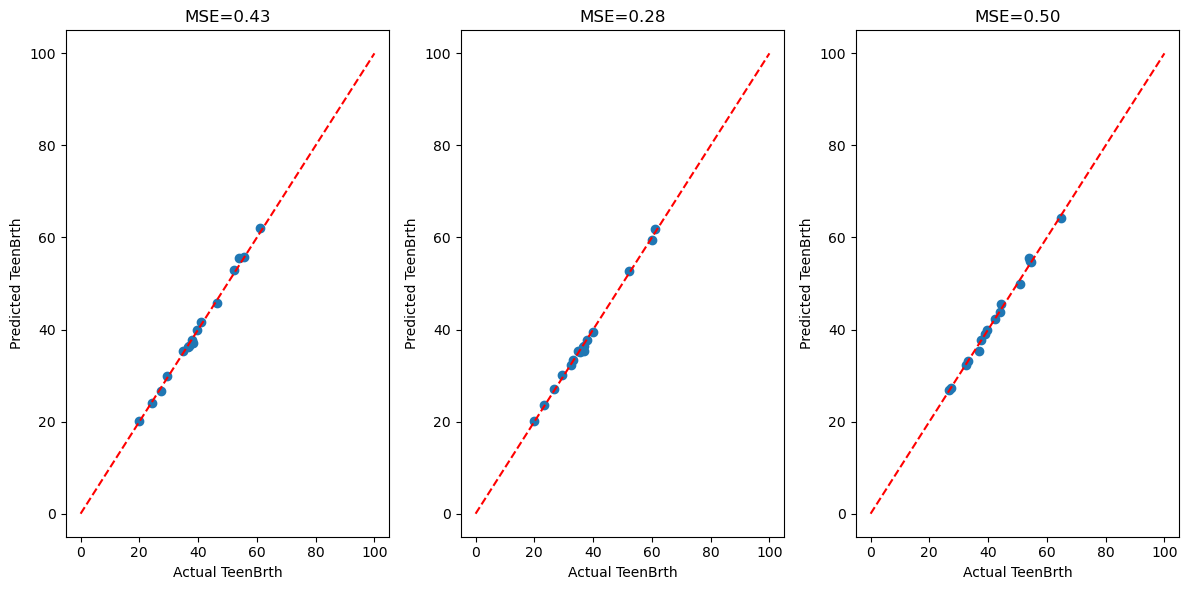

In [11]:
# plot the three regressions
plt.figure(figsize=(12, 6))

# plot the first regression
plt.subplot(1, 3, 1)
plt.scatter(test1[y_col], np.dot(np.hstack((np.ones((len(test1), 1)), test1[x_cols].values)), beta_hat1))
plt.plot([0, 100], [0, 100], 'r--')
plt.title(f'MSE={mse1:.2f}', fontsize=12)
plt.xlabel('Actual TeenBrth')
plt.ylabel('Predicted TeenBrth')

# plot the second regression
plt.subplot(1, 3, 2)
plt.scatter(test2[y_col], np.dot(np.hstack((np.ones((len(test2), 1)), test2[x_cols].values)), beta_hat2))
plt.plot([0, 100], [0, 100], 'r--')
plt.title(f'MSE={mse2:.2f}', fontsize=12)
plt.xlabel('Actual TeenBrth')
plt.ylabel('Predicted TeenBrth')

# plot the third regression
plt.subplot(1, 3, 3)
plt.scatter(test3[y_col], np.dot(np.hstack((np.ones((len(test3), 1)), test3[x_cols].values)), beta_hat3))
plt.plot([0, 100], [0, 100], 'r--')
plt.title(f'MSE={mse3:.2f}', fontsize=12)
plt.xlabel('Actual TeenBrth')
plt.ylabel('Predicted TeenBrth')

plt.tight_layout()
plt.show()


# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [35]:
X = data[['PovPct','ViolCrime','Brth15to17', 'Brth18to19']]
y = data['TeenBrth']

In [36]:
X = X.to_numpy()
y = y.to_numpy()

In [37]:
import pandas as pd
import numpy as np

# extract the features and target variable
X = data[['PovPct', 'ViolCrime', 'Brth15to17', 'Brth18to19']]
y = data['TeenBrth']

# add a column of ones to X to represent the intercept term
X = np.hstack([np.ones((len(X), 1)), X])

# compute the coefficients using the normal equation
coeffs = np.linalg.inv(X.T @ X) @ X.T @ y

# print the coefficients
print(coeffs)



[-0.39935422  0.07665873  0.02183391  0.55653209  0.40356456]


In [38]:
import csv
import numpy as np

# extract the features and target variable
X = data[['PovPct', 'ViolCrime', 'Brth15to17', 'Brth18to19']]
y = data['TeenBrth']

# add a column of ones to X to represent the intercept term
X = np.concatenate((np.ones((len(y), 1)), X), axis=1)

# calculate the coefficients using the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# calculate the residuals
residuals = y - X.dot(theta)

# calculate the residual standard error
rse = np.sqrt(np.sum(residuals**2) / (len(y) - X.shape[1]))

# calculate the standard errors of the coefficients
XtX_inv = np.linalg.inv(X.T.dot(X))
se = np.sqrt(np.diagonal(XtX_inv) * rse**2)

# print the standard errors of the coefficients
print(se)


[0.41521251 0.02807353 0.01354053 0.04323596 0.01482701]


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# extract the features and target variable
X = data[['PovPct', 'ViolCrime', 'Brth15to17', 'Brth18to19']]
y = data['TeenBrth']

# add a column of ones to X to represent the intercept term
X = sm.add_constant(X)

# fit the model using OLS
model = sm.OLS(y, X).fit()

# print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5842.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.33e-61
Time:                        14:36:10   Log-Likelihood:                -41.001
No. Observations:                  51   AIC:                             92.00
Df Residuals:                      46   BIC:                             101.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3994      0.415     -0.962      0.3

# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [42]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

In [44]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# define the true function
def functionf(x):
    return 2 - x + x**2

# generate training, validation, and test sets
X_train, y_train = sample_ds(10)
X_val, y_val = sample_ds(10)
X_test, y_test = sample_ds(1000)

# initialize lists to store MSE values
train_mse = []
val_mse = []
test_mse = []

# loop over polynomial degrees and fit models
for degree in range(1, 9):
    # create pipeline with polynomial features and linear regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # fit the model on the training set
    model.fit(X_train.reshape(-1, 1), y_train)

    # calculate MSE for training set
    y_pred_train = model.predict(X_train.reshape(-1, 1))
    train_mse.append(mean_squared_error(y_train, y_pred_train))

    # calculate MSE for validation set
    y_pred_val = model.predict(X_val.reshape(-1, 1))
    val_mse.append(mean_squared_error(y_val, y_pred_val))

    # calculate MSE for test set
    y_pred_test = model.predict(X_test.reshape(-1, 1))
    test_mse.append(mean_squared_error(y_test, y_pred_test))

# print the MSE values for each polynomial degree
for degree in range(1, 9):
    print(f"Polynomial degree: {degree}")
    print(f"Train MSE: {train_mse[degree-1]:.3f}")
    print(f"Validation MSE: {val_mse[degree-1]:.3f}")
    print(f"Test MSE: {test_mse[degree-1]:.3f}")
    print()


Polynomial degree: 1
Train MSE: 8.311
Validation MSE: 7.814
Test MSE: 8.368

Polynomial degree: 2
Train MSE: 0.072
Validation MSE: 0.203
Test MSE: 0.212

Polynomial degree: 3
Train MSE: 0.065
Validation MSE: 0.184
Test MSE: 0.199

Polynomial degree: 4
Train MSE: 0.064
Validation MSE: 0.185
Test MSE: 0.197

Polynomial degree: 5
Train MSE: 0.030
Validation MSE: 1.090
Test MSE: 0.783

Polynomial degree: 6
Train MSE: 0.025
Validation MSE: 1.479
Test MSE: 0.795

Polynomial degree: 7
Train MSE: 0.025
Validation MSE: 1.893
Test MSE: 0.740

Polynomial degree: 8
Train MSE: 0.024
Validation MSE: 21.962
Test MSE: 10.314

